## **Maximum Likelihood Estimation (MLE) Method**


MLE is a method that uses the sample mean and sample variance of values sampled from the original distribution to maximize the likelihood function. While the expectation of the sample mean converges to the mean of the original distribution, the sample variance is biased and systematically underestimates the population variance. This bias is by a factor of \((N-1)/N\), as shown in the following result:

$$
\mathbb{E}[\text{Sample Variance}] = \frac{N-1}{N} \cdot \text{Population Variance}
$$

Thus, the sample variance is expressed as the population variance multiplied by $\frac{N-1}{N}$.
Therefore, when using MLE, the sample variance may not accurately estimate the population variance. To address this, the unbiased sample variance.  

---

### **Python Implementation**

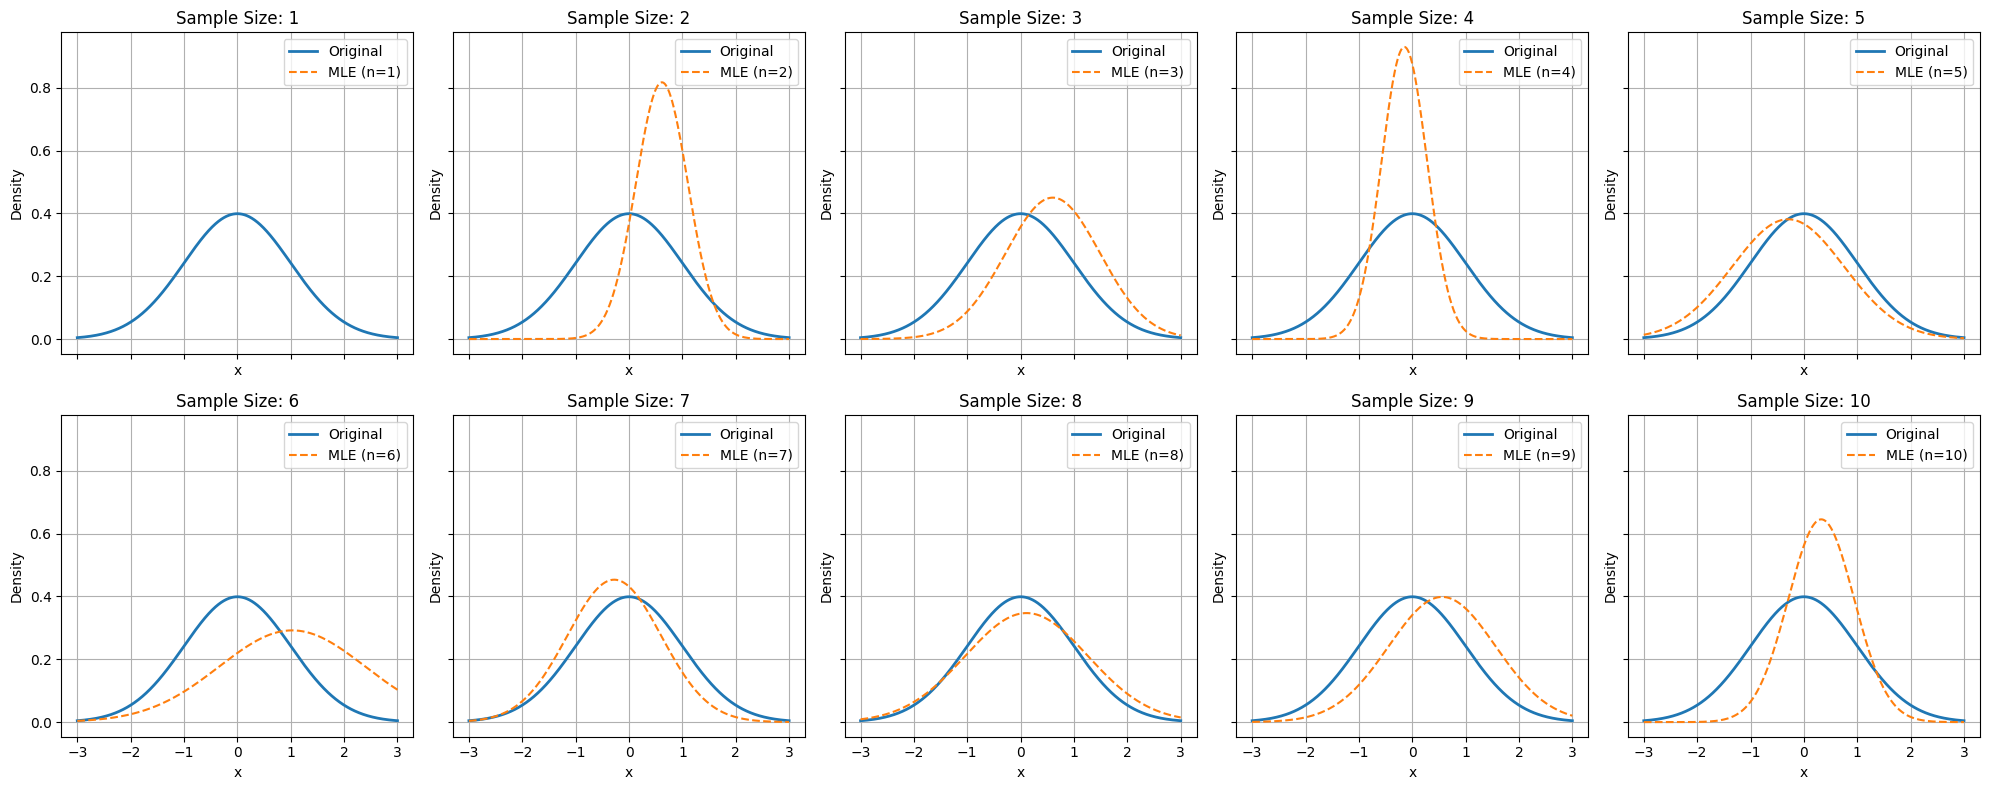

In [51]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

# Define constants for the original distribution
x = np.linspace(-3, 3, 1000)  # Range for x values
mu = 0                        # Mean of the original distribution
std = 1                       # Standard deviation of the original distribution
original_dist = norm.pdf(x=x, loc=mu, scale=std)  # Original distribution PDF

# Number of samples to simulate
num_samples = 10

# Set up subplots
fig, axes = plt.subplots(2, 5, figsize=(20, 8), sharex=True, sharey=True)
axes = axes.ravel()  # Flatten the 2D array of axes for easier indexing

# Loop through different sample sizes to calculate MLE distributions
for i, n in enumerate(range(1, num_samples + 1)):
    # Sample values from the original distribution
    sampled_values = norm.rvs(loc=mu, scale=std, size=n)

    # Compute the sample mean and sample variance
    sample_mean = np.mean(sampled_values)
    sample_var = np.mean((sampled_values - sample_mean) ** 2)  # Sample variance

    # MLE distribution based on sampled data
    MLE_dist = norm.pdf(x=x, loc=sample_mean, scale=np.sqrt(sample_var))

    # Plot original and MLE distributions
    ax = axes[i]
    ax.plot(x, original_dist, label="Original", linewidth=2)
    ax.plot(x, MLE_dist, label=f"MLE (n={n})", linestyle="--")
    ax.set_title(f"Sample Size: {n}")
    ax.set_xlabel("x")
    ax.set_ylabel("Density")
    ax.legend()
    ax.grid(True)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

### **Conclusion**
It can be observed that while the sample mean converges to the original distribution's mean, the sample variance does not fully converge to the original variance, when the sample size ranges from 1 to 10.